In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

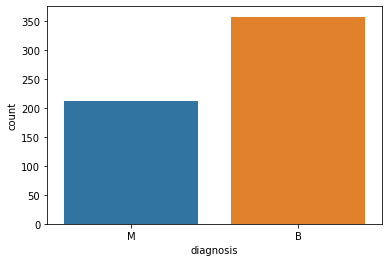

In [8]:
sns.countplot(x='diagnosis',data=df)

In [9]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

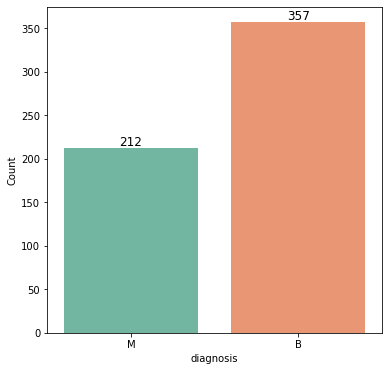

In [10]:
# Create the countplot
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [11]:
x = df.drop('diagnosis',axis=1)

In [12]:
y = df[['diagnosis']]

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

In [14]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [15]:
ytest.shape

(171, 1)

In [16]:
xtest.shape

(171, 30)

# XGBoost


In [17]:
# before 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier 

In [19]:
GB = GradientBoostingClassifier (random_state= 40)

In [20]:
GB.fit (xtrain, ytrain)

GradientBoostingClassifier(random_state=40)

In [21]:
y_pred_GB = GB.predict(xtest)

In [22]:
y_pred_GB

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [23]:
print("GradientBoostingClassifier:")
print("Accuracy:", accuracy_score(ytest, y_pred_GB), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_GB))

GradientBoostingClassifier:
Accuracy: 0.9590643274853801 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       108
           M       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# ADA Boost# 

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
AD = AdaBoostClassifier(random_state= 40)

In [26]:
AD.fit (xtrain, ytrain)

AdaBoostClassifier(random_state=40)

In [27]:
y_pred_AD = AD.predict(xtest)

In [28]:
y_pred_AD

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [29]:
print("AdaBoostClassifier:")
print("Accuracy:", accuracy_score(ytest, y_pred_AD), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_AD))

AdaBoostClassifier:
Accuracy: 0.9766081871345029 

Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [30]:
#After 

In [31]:
# Define hyperparameters for  XGBoost

GB_params = {
    'n_estimators' :[100,200],
    'learning_rate': [0.1,0.001],
    'min_samples_split' : [1.5,2],
    'min_samples_leaf' : [1, 2,2.5,6],
    'max_depth' : [None,3,4],
    'init' : [None,'estimator','zero'],
    'max_features' : [None,'sqrt', 'log2'],
    'ccp_alpha' : [0.0,1.0],
} 

In [32]:
# Perform Grid Search for XGBoost 
GB_grid_search = GridSearchCV(estimator=GradientBoostingClassifier (random_state=40),
                              param_grid=GB_params, cv=6)
GB_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=6, estimator=GradientBoostingClassifier(random_state=40),
             param_grid={'ccp_alpha': [0.0, 1.0],
                         'init': [None, 'estimator', 'zero'],
                         'learning_rate': [0.1, 0.001],
                         'max_depth': [None, 3, 4],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 2.5, 6],
                         'min_samples_split': [1.5, 2],
                         'n_estimators': [100, 200]})

In [33]:
GB_grid_search.cv_results_

{'mean_fit_time': array([0.00260341, 0.0052073 , 0.48077083, ..., 0.00292615, 0.08607197,
        0.17786658]),
 'std_fit_time': array([0.00582141, 0.00736423, 0.0782629 , ..., 0.00101701, 0.0079703 ,
        0.01196351]),
 'mean_score_time': array([0.        , 0.        , 0.00260361, ..., 0.        , 0.00260357,
        0.        ]),
 'std_score_time': array([0.        , 0.        , 0.00582185, ..., 0.        , 0.00582176,
        0.        ]),
 'param_ccp_alpha': masked_array(data=[0.0, 0.0, 0.0, ..., 1.0, 1.0, 1.0],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_init': masked_array(data=[None, None, None, ..., 'zero', 'zero', 'zero'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, ..., 0.001, 0.001, 0.001],
              mask=[False, False, False, ..., False, False, False],


In [34]:
tuning_result_GB_gs = pd.DataFrame(GB_grid_search.cv_results_)
tuning_result_GB_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_init,param_learning_rate,param_max_depth,param_max_features,param_min_samples_leaf,...,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002603,0.005821,0.000000,0.000000,0.0,None,0.1,None,None,1,...,"{'ccp_alpha': 0.0, 'init': None, 'learning_rat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1728
1,0.005207,0.007364,0.000000,0.000000,0.0,None,0.1,None,None,1,...,"{'ccp_alpha': 0.0, 'init': None, 'learning_rat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842
2,0.480771,0.078263,0.002604,0.005822,0.0,None,0.1,None,None,1,...,"{'ccp_alpha': 0.0, 'init': None, 'learning_rat...",0.925373,0.880597,0.909091,0.924242,0.939394,0.893939,0.912106,0.019999,161
3,0.833195,0.127742,0.005872,0.007037,0.0,None,0.1,None,None,1,...,"{'ccp_alpha': 0.0, 'init': None, 'learning_rat...",0.940299,0.880597,0.909091,0.939394,0.939394,0.893939,0.917119,0.024032,157
4,0.002604,0.005822,0.000000,0.000000,0.0,None,0.1,None,None,2,...,"{'ccp_alpha': 0.0, 'init': None, 'learning_rat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.002604,0.005822,0.000000,0.000000,1.0,zero,0.001,4,log2,2.5,...,"{'ccp_alpha': 1.0, 'init': 'zero', 'learning_r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,838
1724,0.006296,0.007001,0.000000,0.000000,1.0,zero,0.001,4,log2,6,...,"{'ccp_alpha': 1.0, 'init': 'zero', 'learning_r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,837
1725,0.002926,0.001017,0.000000,0.000000,1.0,zero,0.001,4,log2,6,...,"{'ccp_alpha': 1.0, 'init': 'zero', 'learning_r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,836
1726,0.086072,0.007970,0.002604,0.005822,1.0,zero,0.001,4,log2,6,...,"{'ccp_alpha': 1.0, 'init': 'zero', 'learning_r...",0.626866,0.626866,0.636364,0.621212,0.621212,0.621212,0.625622,0.005429,163


In [35]:
GB_grid_search.best_params_

{'ccp_alpha': 0.0,
 'init': 'zero',
 'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [36]:
# XGboost and Grid Search
y_pred_GB_gs = GB_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_GB_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_GB_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [37]:
# Define hyperparameters for  Adaboost

AD_params = {
    'n_estimators' :[50,100,200],
    'learning_rate': [1.0,2.0,3.0],
    
} 

In [38]:
# Perform Grid Search for Adaboost 
AD_grid_search = GridSearchCV(estimator=AdaBoostClassifier (random_state=40),
                              param_grid=AD_params, cv=5)
AD_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=40),
             param_grid={'learning_rate': [1.0, 2.0, 3.0],
                         'n_estimators': [50, 100, 200]})

In [39]:
AD_grid_search.cv_results_

{'mean_fit_time': array([0.15428243, 0.26652675, 0.52996035, 0.12911844, 0.25078869,
        0.52385082, 0.12611518, 0.22834153, 0.39353261]),
 'std_fit_time': array([0.01553432, 0.01702954, 0.02339065, 0.00573289, 0.01040792,
        0.02654581, 0.01718831, 0.02413697, 0.06548538]),
 'mean_score_time': array([0.        , 0.01609421, 0.03436456, 0.01509051, 0.01562123,
        0.0343657 , 0.00937257, 0.02186918, 0.03312488]),
 'std_score_time': array([0.00000000e+00, 9.29415304e-04, 6.24938023e-03, 1.06146369e-03,
        3.50402318e-07, 6.24868870e-03, 7.65266984e-03, 7.65239731e-03,
        3.76906399e-03]),
 'param_learning_rate': masked_array(data=[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
              mask=[False, False, False, False, Fals

In [40]:
tuning_result_AD_gs = pd.DataFrame(AD_grid_search.cv_results_)
tuning_result_AD_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154282,0.015534,0.000000,0.000000e+00,1.0,50,"{'learning_rate': 1.0, 'n_estimators': 50}",0.9750,0.9500,0.9750,0.974684,0.936709,0.962278,0.016013,1
1,0.266527,0.017030,0.016094,9.294153e-04,1.0,100,"{'learning_rate': 1.0, 'n_estimators': 100}",0.9750,0.9375,0.9875,0.974684,0.911392,0.957215,0.028380,3
2,0.529960,0.023391,0.034365,6.249380e-03,1.0,200,"{'learning_rate': 1.0, 'n_estimators': 200}",0.9750,0.9375,1.0000,0.974684,0.924051,0.962247,0.027619,2
3,0.129118,0.005733,0.015091,1.061464e-03,2.0,50,"{'learning_rate': 2.0, 'n_estimators': 50}",0.8875,0.8875,0.4625,0.886076,0.303797,0.685475,0.251899,9
4,0.250789,0.010408,0.015621,3.504023e-07,2.0,100,"{'learning_rate': 2.0, 'n_estimators': 100}",0.9875,0.8875,0.4625,0.873418,0.303797,0.702943,0.268785,7
5,0.523851,0.026546,0.034366,6.248689e-03,2.0,200,"{'learning_rate': 2.0, 'n_estimators': 200}",0.9625,0.8750,0.4625,0.873418,0.303797,0.695443,0.261872,8
6,0.126115,0.017188,0.009373,7.652670e-03,3.0,50,"{'learning_rate': 3.0, 'n_estimators': 50}",0.8375,0.8500,0.8125,0.683544,0.354430,0.707595,0.186260,6
7,0.228342,0.024137,0.021869,7.652397e-03,3.0,100,"{'learning_rate': 3.0, 'n_estimators': 100}",0.8375,0.8875,0.8125,0.683544,0.354430,0.715095,0.192493,4
8,0.393533,0.065485,0.033125,3.769064e-03,3.0,200,"{'learning_rate': 3.0, 'n_estimators': 200}",0.8375,0.8875,0.8125,0.683544,0.354430,0.715095,0.192493,4


In [41]:
AD_grid_search.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

In [42]:
# XGboost and Grid Search
y_pred_AD_gs = AD_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_AD_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_AD_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.9766081871345029
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Hyperparameter optimization using Randomized Search# 

In [43]:
gb_params = {
    'n_estimators' :[100,200],
    'learning_rate': [0.1,0.001],
    'min_samples_split' : [1.5,2],
    'min_samples_leaf' : [1, 2,2.5,6],
    'max_depth' : [None,3,4],
    'init' : [None,'estimator','zero'],
    'max_features' : [None,'sqrt', 'log2'],
    'ccp_alpha' : [0.0,1.0],
} 

ad_params = {
    'n_estimators' :[50,100,200],
    'learning_rate': [1.0,2.0,3.0],
    
} 

In [44]:
# Perform Randomized Search for XGBoost 
gb_random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier (random_state=40),
                                      param_distributions=gb_params, n_iter=80, cv=5, random_state=40)
gb_random_search.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=40),
                   n_iter=80,
                   param_distributions={'ccp_alpha': [0.0, 1.0],
                                        'init': [None, 'estimator', 'zero'],
                                        'learning_rate': [0.1, 0.001],
                                        'max_depth': [None, 3, 4],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 2.5, 6],
                                        'min_samples_split': [1.5, 2],
                                        'n_estimators': [100, 200]},
                   random_state=40)

In [45]:
gb_random_search.cv_results_

{'mean_fit_time': array([5.15031815e-03, 1.18463850e-01, 3.13119888e-03, 0.00000000e+00,
        3.12433243e-03, 1.03663731e-01, 3.12490463e-03, 3.12418938e-03,
        1.24903774e-01, 6.24871254e-03, 3.12404633e-03, 1.90973091e-01,
        2.38206911e-01, 0.00000000e+00, 3.12404633e-03, 6.24880791e-03,
        3.12409401e-03, 3.69372368e-03, 3.78961563e-03, 1.20496750e-03,
        7.25069523e-02, 3.12509537e-03, 3.74809551e-01, 3.12514305e-03,
        3.12409401e-03, 3.12433243e-03, 0.00000000e+00, 6.36353493e-03,
        5.75750399e-01, 6.06012344e-04, 6.24971390e-03, 1.03691492e+00,
        6.86106682e-03, 1.71114988e+00, 1.78523111e-01, 0.00000000e+00,
        6.24856949e-03, 6.49108887e-03, 2.99139023e-03, 1.80811882e-03,
        3.12504768e-03, 1.18406248e-01, 0.00000000e+00, 2.94783592e-01,
        3.12433243e-03, 3.12428474e-03, 5.30101395e-01, 2.22569227e-01,
        6.24918938e-03, 0.00000000e+00, 8.80666256e-02, 7.81791687e-02,
        1.49808931e-01, 2.07204390e-01, 0.00000

In [46]:
tuning_result_gb_rs = pd.DataFrame(gb_random_search.cv_results_)
tuning_result_gb_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_learning_rate,...,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005150,0.005960,0.0,0.0,200,1.5,6,log2,3,0.001,...,0.0,"{'n_estimators': 200, 'min_samples_split': 1.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,46
1,0.118464,0.007871,0.0,0.0,100,2,2,log2,4,0.001,...,0.0,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.9375,0.95,0.9625,0.936709,0.949367,0.947215,0.009495,10
2,0.003131,0.006262,0.0,0.0,100,1.5,1,log2,None,0.001,...,0.0,"{'n_estimators': 100, 'min_samples_split': 1.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
3,0.000000,0.000000,0.0,0.0,100,2,2.5,log2,3,0.001,...,1.0,"{'n_estimators': 100, 'min_samples_split': 2, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
4,0.003124,0.006249,0.0,0.0,200,1.5,6,log2,None,0.001,...,0.0,"{'n_estimators': 200, 'min_samples_split': 1.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.003124,0.006248,0.0,0.0,100,1.5,1,log2,3,0.001,...,1.0,"{'n_estimators': 100, 'min_samples_split': 1.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
76,0.003124,0.006248,0.0,0.0,100,1.5,6,log2,3,0.001,...,1.0,"{'n_estimators': 100, 'min_samples_split': 1.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
77,0.006249,0.007653,0.0,0.0,100,1.5,2.5,None,None,0.1,...,0.0,"{'n_estimators': 100, 'min_samples_split': 1.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
78,0.003124,0.006248,0.0,0.0,200,1.5,1,sqrt,4,0.1,...,1.0,"{'n_estimators': 200, 'min_samples_split': 1.5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,76


In [47]:
gb_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1,
 'init': 'zero',
 'ccp_alpha': 0.0}

In [48]:
y_pred_gb_rs = gb_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_gb_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_gb_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [49]:
# Perform Randomized Search for Adaboost 
ad_random_search = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=40),
                                      param_distributions=ad_params, n_iter=150, cv=5, random_state=40)
ad_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=40),
                   n_iter=150,
                   param_distributions={'learning_rate': [1.0, 2.0, 3.0],
                                        'n_estimators': [50, 100, 200]},
                   random_state=40)

In [50]:
ad_random_search.cv_results_

{'mean_fit_time': array([0.1465672 , 0.27604418, 0.53622527, 0.1321044 , 0.26642337,
        0.52615671, 0.1324523 , 0.221068  , 0.41496434]),
 'std_fit_time': array([0.01625086, 0.0262044 , 0.02520552, 0.01602972, 0.01365556,
        0.01931561, 0.01243114, 0.02598161, 0.10126673]),
 'mean_score_time': array([0.01249089, 0.0187438 , 0.03124142, 0.00937319, 0.01874509,
        0.04112062, 0.00863562, 0.02331152, 0.03078604]),
 'std_score_time': array([6.24546077e-03, 6.24845048e-03, 1.50789149e-07, 7.65317599e-03,
        6.24840263e-03, 8.07784740e-03, 7.17839843e-03, 6.99034248e-03,
        9.13265571e-04]),
 'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0],
              mask=[False, False, False, False, Fals

In [51]:
tuning_result_ad_rs = pd.DataFrame(ad_random_search.cv_results_)
tuning_result_ad_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.146567,0.016251,0.012491,6.245461e-03,50,1.0,"{'n_estimators': 50, 'learning_rate': 1.0}",0.9750,0.9500,0.9750,0.974684,0.936709,0.962278,0.016013,1
1,0.276044,0.026204,0.018744,6.248450e-03,100,1.0,"{'n_estimators': 100, 'learning_rate': 1.0}",0.9750,0.9375,0.9875,0.974684,0.911392,0.957215,0.028380,3
2,0.536225,0.025206,0.031241,1.507891e-07,200,1.0,"{'n_estimators': 200, 'learning_rate': 1.0}",0.9750,0.9375,1.0000,0.974684,0.924051,0.962247,0.027619,2
3,0.132104,0.016030,0.009373,7.653176e-03,50,2.0,"{'n_estimators': 50, 'learning_rate': 2.0}",0.8875,0.8875,0.4625,0.886076,0.303797,0.685475,0.251899,9
4,0.266423,0.013656,0.018745,6.248403e-03,100,2.0,"{'n_estimators': 100, 'learning_rate': 2.0}",0.9875,0.8875,0.4625,0.873418,0.303797,0.702943,0.268785,7
5,0.526157,0.019316,0.041121,8.077847e-03,200,2.0,"{'n_estimators': 200, 'learning_rate': 2.0}",0.9625,0.8750,0.4625,0.873418,0.303797,0.695443,0.261872,8
6,0.132452,0.012431,0.008636,7.178398e-03,50,3.0,"{'n_estimators': 50, 'learning_rate': 3.0}",0.8375,0.8500,0.8125,0.683544,0.354430,0.707595,0.186260,6
7,0.221068,0.025982,0.023312,6.990342e-03,100,3.0,"{'n_estimators': 100, 'learning_rate': 3.0}",0.8375,0.8875,0.8125,0.683544,0.354430,0.715095,0.192493,4
8,0.414964,0.101267,0.030786,9.132656e-04,200,3.0,"{'n_estimators': 200, 'learning_rate': 3.0}",0.8375,0.8875,0.8125,0.683544,0.354430,0.715095,0.192493,4


In [52]:
ad_random_search.best_params_

{'n_estimators': 50, 'learning_rate': 1.0}

In [53]:
y_pred_ad_rs = ad_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_ad_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_ad_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9766081871345029
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

